In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import seaborn as sns
import re
colors = pd.read_csv(r'C:\Users\dell\Desktop\Python_project\ZYD366\bra\colors.csv')  #导入colors.csv文件
bra = pd.read_csv(r'C:\Users\dell\Desktop\Python_project\ZYD366\bra\bra.csv')#导入bra.csv文件
new_name = {'0':'productColor', '1':'color'}
colors.rename(columns = new_name, inplace = True)  #重新命名colors文件的列名
bra_colors = pd.merge(bra, colors, how='outer')  #合并bra 和 colors两个csv文件
bra_color = bra_colors.dropna()   #删除空缺值
bra_color

,creationTime,productColor,productSize,Unnamed: 0,color
0,2016-06-08 17:17:00,22咖啡色,75C,0,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,0,棕色
2,2017-08-03 20:39:18,22咖啡色,80B,0,棕色
3,2016-07-06 14:02:08,22咖啡色,75B,0,棕色
4,2017-03-18 11:49:55,22咖啡色,80B,0,棕色
...,...,...,...,...,...
15492,2017-11-03 16:39:13,粉色套装（含内裤）,34A/75A,116,粉色
15493,2017-11-07 23:03:10,粉色套装（含内裤）,34B/75B,116,粉色
15494,2017-11-14 17:25:37,粉色套装（含内裤）,34A/75A,116,粉色
15495,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C,116,粉色


In [136]:
d={}
for x in bra_color['productSize']: #尺码替换
    if '70' in x or '32' in x:
        x='68-72cm'
    if '75' in x or '34' in x:
        x='73-77cm'
    if '65' in x or '30' in x:
        x='63-67cm'
    if '80' in x or '36' in x:
        x='78-82cm'        
    if '85' in x or '38' in x: 
        x='83-87cm'        
    if '90' in x or '40' in x:
        x='88-92cm'
    if '95' in x or '42' in x:
        x='93-97cm'
    if not x in d:                 #构造字典并查看各值重复的次数
        d[x]=1
    else:
        d[x]=d[x]+1
print(d)
c={}
for x in bra_color['color']:       #构造字典并查看各值重复的次数
    if not x in c:
        c[x]=1    
    else:
        c[x]=c[x]+1
print(c)

{'73-77cm': 8164, '78-82cm': 4845, '68-72cm': 845, '83-87cm': 1394, '63-67cm': 152, '88-92cm': 87, '93-97cm': 9}
{'棕色': 51, '粉色': 2000, '蓝色': 3423, '黑色': 2142, '肤色': 2169, '红色': 2715, '紫色': 2505, '黄色': 268, '灰色': 126, '绿色': 97}


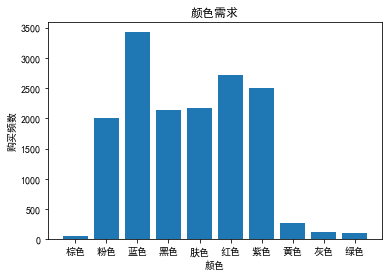

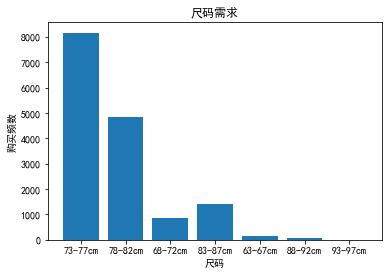

In [137]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False      #添加图形字体
x1 = list(d.keys())
y1 = list(d.values())
x2 = list(c.keys())
y2 = list(c.values())
plt.bar(x2,y2)                 #构造颜色需求的条形图
plt.xlabel('颜色')           
plt.ylabel('购买频数')
plt.title('颜色需求')
plt.show()
plt.bar(x1,y1)                #构造尺码需求的条形图
plt.xlabel('尺码')         
plt.ylabel('购买频数')
plt.title('尺码需求')
plt.show()